In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# TCGA ALL CLINICAL DATA DISTRUBUTION

### Reading and Organizing data

In [2]:
all_clinical_df = pd.read_csv('TCGA-clinical.tsv', sep='\t') 

In [3]:
all_clinical_df = all_clinical_df[['cases.case_id', 'cases.primary_site','demographic.country_of_residence_at_enrollment',
                  'demographic.ethnicity', 'demographic.gender', 'demographic.race','treatments.treatment_type', 'diagnoses.ajcc_pathologic_stage']]

# Rename specific columns
all_clinical_df = all_clinical_df.rename(columns={
    'cases.case_id': 'id',
    'cases.primary_site': 'cancer_type',
    'demographic.country_of_residence_at_enrollment': 'residence',
    'demographic.ethnicity': 'ethnicity',
    'demographic.gender': 'gender',
    'demographic.race': 'race',
    'treatments.treatment_type': 'treatment_type',
    'diagnoses.ajcc_pathologic_stage': 'stage'
})

all_clinical_df.head(5)

,id,cancer_type,residence,ethnicity,gender,race,treatment_type,stage
0,00016c8f-a0be-4319-9c42-4f3bcd90ac92,Breast,'--,not reported,female,not reported,'--,'--
1,00048fa6-4318-42ef-9709-7dedb0d938b3,Bronchus and lung,'--,not reported,male,not reported,'--,'--
2,0004d251-3f70-4395-b175-c94c2f5b1b81,Liver and intrahepatic bile ducts,'--,not hispanic or latino,male,asian,"Radiation Therapy, NOS",Stage I
3,0004d251-3f70-4395-b175-c94c2f5b1b81,Liver and intrahepatic bile ducts,'--,not hispanic or latino,male,asian,"Pharmaceutical Therapy, NOS",Stage I
4,0004d251-3f70-4395-b175-c94c2f5b1b81,Liver and intrahepatic bile ducts,'--,not hispanic or latino,male,asian,"Ablation or Embolization, NOS",Stage I


In [12]:
len(all_clinical_df)

111100

### Creating DF for Ethnic Distribution

In [4]:
#creating a dataframe of ethnicity
all_ethnicity_df = pd.DataFrame(all_clinical_df['ethnicity'].value_counts())

#Combining ethnicities represented as unknown
all_ethnicity_df = all_ethnicity_df.rename(index={
    'Unknown': 'Unknown/Other',
    'unknown': 'Unknown/Other',
    "'--": 'Unknown/Other',
    'not reported': 'Unknown/Other',
    "not hispanic or latino":"Not Hispanic or Latino",
    "hispanic or latino":"Hispanic or Latino"
})

#Group and re-sum the categories 
all_ethnicity_df = all_ethnicity_df.groupby(all_ethnicity_df.index).sum()

#Calculating percentage of ethnicity
all_ethnicity_df['percentage'] = round((all_ethnicity_df['count'] / all_ethnicity_df['count'].sum()) * 100, 2)

#Sorting the values
all_ethnicity_df = all_ethnicity_df.sort_values('percentage', ascending=False)

print(all_ethnicity_df) 

                        count  percentage
ethnicity                                
Not Hispanic or Latino  67156       60.45
Unknown/Other           38245       34.42
Hispanic or Latino       5699        5.13


### Creating DF for Race Category

In [8]:
#Creating a data-frame of race
all_race_df = pd.DataFrame(all_clinical_df['race'].value_counts())

#Re-organizing race namee 
all_race_df = all_race_df.rename(index={
    'Unknown': 'Unknown/Other',
    'unknown': 'Unknown/Other',
    "'--": 'Unknown/Other',
    "other": 'Unknown/Other',
    "black or african american": "Black",
    "asian":"Asian",
    "white":"White",
    "american indian or alaska native":"Native American",
    "native hawaiian or other pacific islander":"Pacific Islander",
    "not allowed to collect":"Unknown/Other",
    "not reported":'Unknown/Other'
})

#Group and re-sum the categories 
all_race_df = all_race_df.groupby(all_race_df.index).sum()

#Calculating percentages
all_race_df['percentage'] = round((all_race_df['count'] / all_race_df['count'].sum()) * 100, 2)

#Sorting values according to percentages (highest to lowest)
all_race_df = all_race_df.sort_values('percentage', ascending = False)

all_race_df

,count,percentage
race,,
White,65861,59.28
Unknown/Other,29801,26.82
Black,10203,9.18
Asian,4809,4.33
Native American,266,0.24
Pacific Islander,160,0.14


### Pie Chart of Race and Ethnic Distribution in TCGA

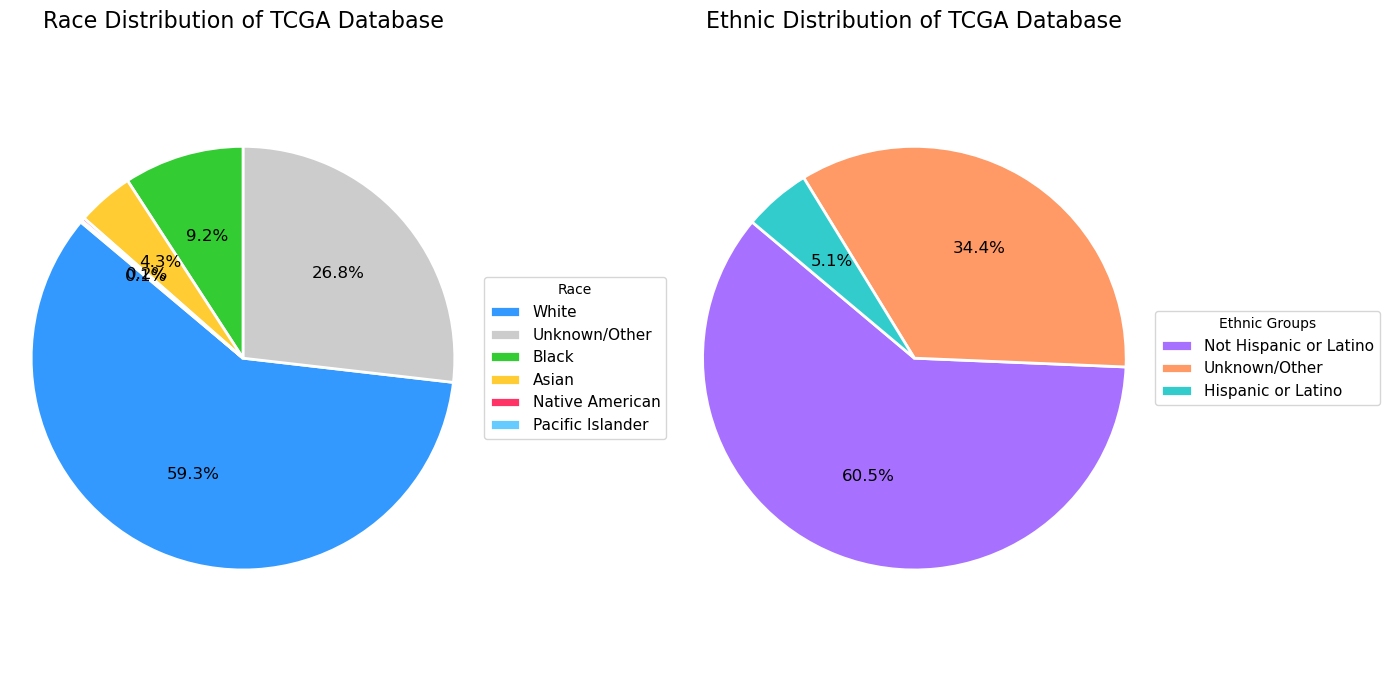

In [11]:
import matplotlib.pyplot as plt

# Define color mappings
race_color_dict = {
    'White': '#3399FF',
    'Black': '#33CC33',
    'Asian': '#FFCC33',
    'Native American': '#FF3366',
    'Pacific Islander': '#66CCFF',
    'Unknown/Other': '#CCCCCC'
}

ethnicity_color_dict = {
    'Not Hispanic or Latino': '#A870FF',
    'Unknown/Other': '#FF9966',
    'Hispanic or Latino': '#33CCCC'
}

# Map colors
race_colors = [race_color_dict[label] for label in all_race_df.index]
ethnicity_colors = [ethnicity_color_dict[label] for label in all_ethnicity_df.index]

# Create side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Race Pie Chart
wedges1, texts1, autotexts1 = axes[0].pie(
    all_race_df['percentage'],
    autopct='%1.1f%%',
    startangle=140,
    colors=race_colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].legend(
    wedges1,
    all_race_df.index,
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[0].set_title("Race Distribution of TCGA Database", fontsize=16)
axes[0].axis('equal')

# Ethnicity Pie Chart
wedges2, texts2, autotexts2 = axes[1].pie(
    all_ethnicity_df['percentage'],
    autopct='%1.1f%%',
    startangle=140,
    colors=ethnicity_colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].legend(
    wedges2,
    all_ethnicity_df.index,
    title="Ethnic Groups",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[1].set_title("Ethnic Distribution of TCGA Database", fontsize=16)
axes[1].axis('equal')

plt.tight_layout()
plt.savefig("TCGA_Race_Ethnicity_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()


# TCGA-BRCA COHORT

### Reading the tcga-brca cohort

In [13]:
clinical_df = pd.read_csv('TCGA-BRCA-clinical.tsv', sep='\t') #how to read tsv files

In [14]:
clinical_df = clinical_df[['cases.case_id', 'cases.primary_site','demographic.country_of_residence_at_enrollment',
                  'demographic.ethnicity', 'demographic.gender', 'demographic.race','treatments.treatment_type', 'diagnoses.ajcc_pathologic_stage']]

# Rename specific columns
clinical_df = clinical_df.rename(columns={
    'cases.case_id': 'id',
    'cases.primary_site': 'cancer_type',
    'demographic.country_of_residence_at_enrollment': 'residence',
    'demographic.ethnicity': 'ethnicity',
    'demographic.gender': 'gender',
    'demographic.race': 'race',
    'treatments.treatment_type': 'treatment_type',
    'diagnoses.ajcc_pathologic_stage': 'stage'
})

clinical_df.head(5)

,id,cancer_type,residence,ethnicity,gender,race,treatment_type,stage
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,Breast,'--,not hispanic or latino,female,white,"Radiation Therapy, NOS",Stage IA
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,Breast,'--,not hispanic or latino,female,white,Hormone Therapy,Stage IA
2,001cef41-ff86-4d3f-a140-a647ac4b10a1,Breast,'--,not hispanic or latino,female,white,"Surgery, NOS",Stage IA
3,0045349c-69d9-4306-a403-c9c1fa836644,Breast,United States,not hispanic or latino,female,white,"Surgery, NOS",Stage I
4,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,Breast,'--,not hispanic or latino,female,white,Bisphosphonate Therapy,Stage IIB


In [15]:
len(clinical_df)

5546

In [18]:
brca_cohort_perc = round(len(clinical_df) / len(all_clinical_df) * 100, 2)
print(brca_cohort_perc)

4.99


### Creating DF for TCGA-BRCA Race Category

In [20]:
#creating a dataframe of ethnicity
ethnicity_df = pd.DataFrame(clinical_df['ethnicity'].value_counts())

#Combining ethnicities represented as unknown
ethnicity_df = ethnicity_df.rename(index={
    'Unknown': 'Unknown/Other',
    "'--": 'Unknown/Other',
    'not reported': 'Unknown/Other',
    "not hispanic or latino":"Not Hispanic or Latino",
    "hispanic or latino":"Hispanic or Latino"
})

#Group and re-sum the categories 
ethnicity_df = ethnicity_df.groupby(ethnicity_df.index).sum()

ethnicity_df['percentage'] = round((ethnicity_df['count'] / ethnicity_df['count'].sum()) * 100, 2)

ethnicity_df = ethnicity_df.sort_values("percentage", ascending = False)

ethnicity_df

,count,percentage
ethnicity,,
Not Hispanic or Latino,4485,80.87
Unknown/Other,826,14.89
Hispanic or Latino,235,4.24


### Creating DF for TCGA-BRCA Race Category

In [22]:
#creating a dataframe of race
race_df = pd.DataFrame(clinical_df['race'].value_counts())

#Combining ethnicities represented as unknown
race_df = race_df.rename(index={
    'not reported': 'Unknown/Other',
    "'--": 'Unknown/Other',
    "asian":"Asian",
    "white":"White",
    "black or african american":"Black",
    "american indian or alaska native":"Native American" 
})

#Group and re-sum the categories 
race_df = race_df.groupby(race_df.index).sum()

race_df['percentage'] = round((race_df['count'] / race_df['count'].sum()) * 100, 2)

race_df = race_df.sort_values("percentage", ascending = False)

race_df

,count,percentage
race,,
White,3856,69.53
Black,1033,18.63
Unknown/Other,410,7.39
Asian,242,4.36
Native American,5,0.09


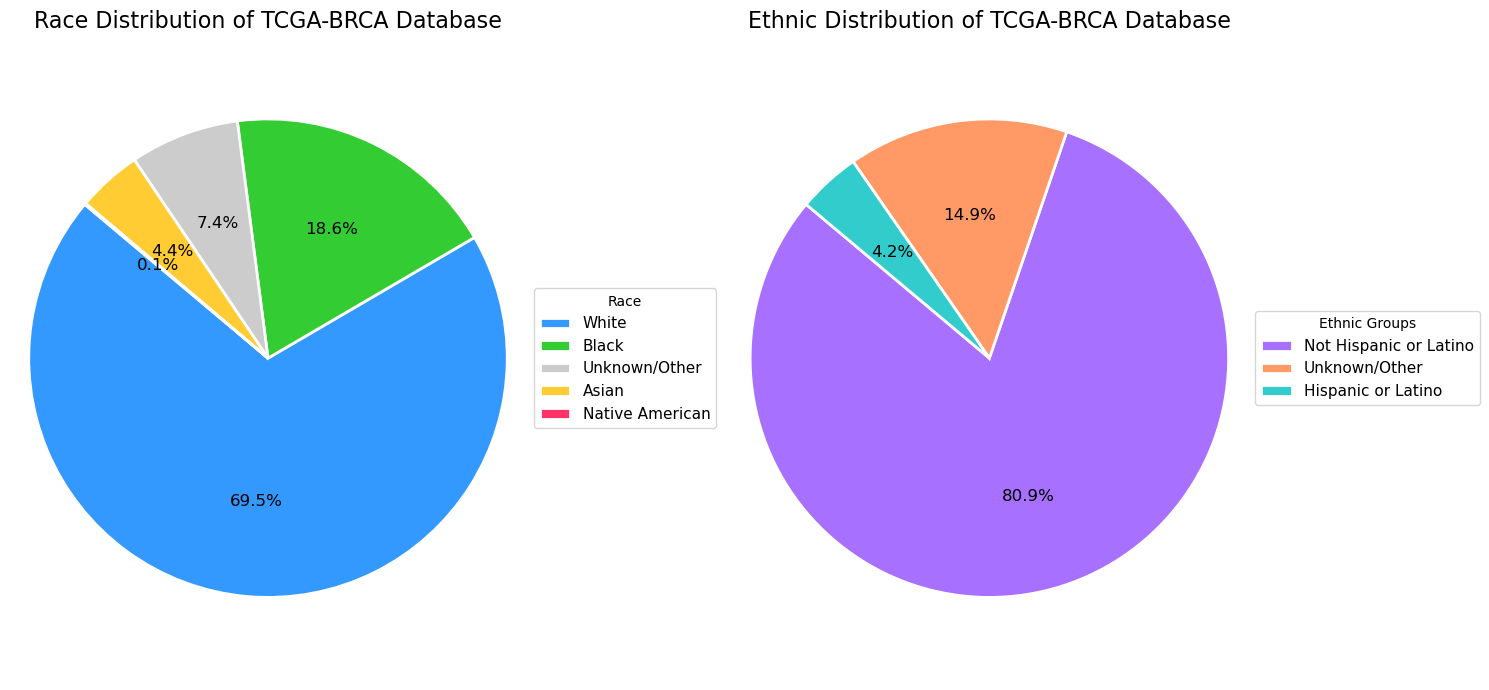

In [29]:
# Define color mappings
ethnicity_color_dict = {
    'Not Hispanic or Latino': '#A870FF',  # bright purple
    'Unknown/Other': '#FF9966',           # bright coral/orange
    'Hispanic or Latino': '#33CCCC'       # teal
}

race_color_dict = {
    'White': '#3399FF',         # strong blue
    'Black': '#33CC33',         # bright green
    'Asian': '#FFCC33',         # bright yellow
    'Native American': '#FF3366',  # bright red-pink
    'Unknown/Other': '#CCCCCC'  # neutral grey
}

# Map colors
ethnicity_colors = [ethnicity_color_dict[label] for label in ethnicity_df.index]
race_colors = [race_color_dict[label] for label in race_df.index]

# Create side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Race pie chart
wedges1, texts1, autotexts1 = axes[0].pie(
    race_df['percentage'],
    autopct='%1.1f%%',
    startangle=140,
    colors=race_colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].legend(
    wedges1,
    race_df.index,
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[0].set_title("Race Distribution of TCGA-BRCA Database", fontsize=16)
axes[0].axis('equal')

# Ethnicity pie chart
wedges2, texts2, autotexts2 = axes[1].pie(
    ethnicity_df['percentage'],
    autopct='%1.1f%%',
    startangle=140,
    colors=ethnicity_colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].legend(
    wedges2,
    ethnicity_df.index,
    title="Ethnic Groups",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[1].set_title("Ethnic Distribution of TCGA-BRCA Database", fontsize=16)
axes[1].axis('equal')

# Layout and save
plt.tight_layout()
plt.savefig("TCGA_BRCA_Race_Ethnicity_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# GENIE ALL COHORTS

In [31]:
#Reading the data
genie_race = pd.read_csv("Race_genie.summary.txt", sep = "\t")

In [32]:
#transforming percentage column from string to float
def clean_percentage(val):
    if isinstance(val, str):
        val = val.strip().replace('%', '')
        if '<' in val:
            return 0.05  # or any small float value like 0.09 to approximate <0.1%
        try:
            return float(val)
        except ValueError:
            return None
    return val

genie_race['Percentage of patients'] = genie_race['Percentage of patients'].apply(clean_percentage)

In [33]:
#manipulating data frame 

#dropping null values
genie_race = genie_race.dropna(how='any')

#filtering percentages lower than 1
genie_race = genie_race[genie_race['Percentage of patients'] > 1]

#renaming not collected to unknown
genie_race["Category"] = genie_race["Category"].replace({
    "Not Collected":"Unknown/Other",
    "Other":'Unknown/Other',
    "Unknown":'Unknown/Other'
})

#Group and re-sum the categories 
genie_race = genie_race.groupby(genie_race["Category"]).sum()

#Calculating percentage of ethnicity
genie_race['Percentage of patients'] = round((genie_race['Number of patients'] / genie_race['Number of patients'].sum()) * 100, 2)

#Sort values
genie_race = genie_race.sort_values('Percentage of patients', ascending=False)

In [34]:
#final data frame for genie all cancer cohorts
genie_race

,Number of patients,Percentage of patients
Category,,
White,132115,66.31
Unknown/Other,44304,22.24
Black,11679,5.86
Asian,11137,5.59


In [37]:
print(genie_race["Number of patients"].sum().astype(int))

199235


# GENIE BRCA

In [40]:
#Reading the data
genie_race_brca = pd.read_csv("race_brca_genie.txt", sep = "\t")

In [41]:
#transforming percentage column from string to float
def clean_percentage(val):
    if isinstance(val, str):
        val = val.strip().replace('%', '')
        if '<' in val:
            return 0.05  # or any small float value like 0.09 to approximate <0.1%
        try:
            return float(val)
        except ValueError:
            return None
    return val

# Apply to both columns safely
genie_race_brca['Percentage of patients'] = genie_race_brca['Percentage of patients'].apply(clean_percentage)


In [42]:
#manipulating data frame 

#dropping null values
genie_race_brca = genie_race_brca.dropna(how='any')

#renaming not collected to unknown
genie_race_brca["Category"] = genie_race_brca["Category"].replace({
    "Other":'Unknown/Other',
    "Unknown":'Unknown/Other',
    'Other Asian, including Asian, NOS and Oriental, NOS': 'Asian',
    'Chinese': 'Asian',
    'Asian Indian': 'Asian',
    'Filipino': 'Asian',
    'No further race documented':'Unknown/Other'
})


#Group and re-sum the categories 
genie_race_brca = genie_race_brca.groupby(genie_race_brca["Category"]).sum()

#Calculating percentage of ethnicity
genie_race_brca['Percentage of patients'] = round((genie_race_brca['Number of patients'] / genie_race_brca['Number of patients'].sum()) * 100, 2)

#Sort values
genie_race_brca = genie_race_brca.sort_values('Percentage of patients', ascending=False)

genie_race_brca

,Number of patients,Percentage of patients
Category,,
White,423,80.57
Unknown/Other,63,12.00
Black,26,4.95
Asian,13,2.48


In [43]:
print(genie_race_brca["Number of patients"].sum().astype(int))

525


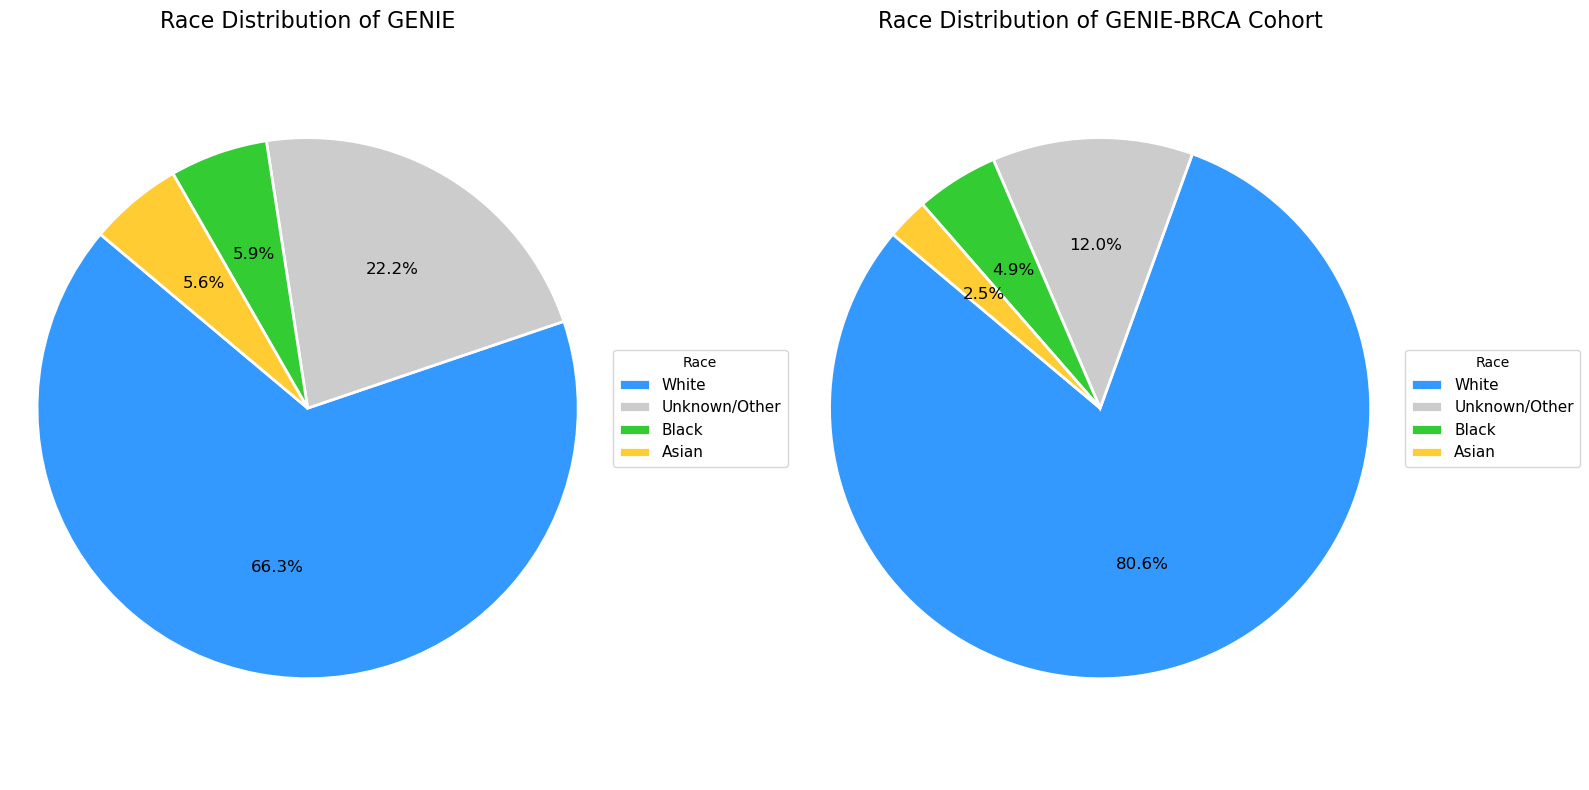

In [46]:
race_color_dict = {
    'White': '#3399FF',       
    'Black': '#33CC33',        
    'Asian': '#FFCC33',
    'Unknown/Other': '#CCCCCC' 
}

# Map colors dynamically based on index
colors = [race_color_dict[label] for label in genie_race_brca.index]

# Create side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for GENIE
wedges1, texts1, autotexts1 = axes[0].pie(
    genie_race['Percentage of patients'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].legend(
    wedges1,
    genie_race.index,
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[0].set_title("Race Distribution of GENIE Database", fontsize=16)
axes[0].axis('equal')

# Pie chart for GENIE-BRCA
wedges2, texts2, autotexts2 = axes[1].pie(
    genie_race_brca['Percentage of patients'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[1].legend(
    wedges2,
    genie_race_brca.index,
    title="Race",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
axes[1].set_title("Race Distribution of GENIE-BRCA Cohort", fontsize=16)
axes[1].axis('equal')

plt.tight_layout()
plt.savefig("GENIE_vs_GENIE_BRCA_Race_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()